In [14]:
from header import *

lr = 0.001
D = 2
import copy

model_f = nsp.model.UnitaryGenerator(D, dtype=torch.float64)
model_g = nsp.model.UnitaryGenerator(D, dtype=torch.complex128)
model_rf = nsp.model.UnitaryRiemanGenerator(D, dtype=torch.float64)
model_rg = nsp.model.UnitaryRiemanGenerator(D, dtype=torch.complex128)

# set_seed(2022)

X = np.random.randn(D**2,D**2)
X = X.T + X 
# X = X_list[1]
loss = nsp.loss.L2(torch.Tensor(X), [D,D])

In [15]:
np.linalg.det(X)

46.99540367041653

In [10]:
(model_rf.matrix())

tensor([[ 0.8514, -0.5246],
        [ 0.5246,  0.8514]], dtype=torch.float64, grad_fn=<ViewBackward0>)

In [11]:
torch.det(model_rf.matrix())

tensor(1.0000, dtype=torch.float64, grad_fn=<DetLuBasedHelperBackward0>)

In [10]:
loss(model.matrix()).backward()

In [13]:
model.matrix()

tensor([[ 0.2471+0.j, -0.2285+0.j],
        [ 0.2666+0.j, -0.5152+0.j]], dtype=torch.complex128,
       grad_fn=<ViewBackward0>)

In [2]:
model = model_rg
model._params.data[:] = model._params.data[:].real
# model.reset_params()
solver = UnitarySymmTs(RiemanCG, model, loss, lr = 0.001, momentum=0.1, pout = True)
ret = solver.run(500, disable_message=False)
print(ret.model._params)

target loss      : 0.0000000000
initial loss     : 0.5642615937




  0%|          | 0/500 [00:00<?, ?it/s]

tensor([[ 0.0000+0.j, -0.6575+0.j],
        [ 0.6575+0.j,  0.0000+0.j]], dtype=torch.complex128)
tensor([[ 0.0000+0.j, -1.6198+0.j],
        [ 1.6198+0.j,  0.0000+0.j]], dtype=torch.complex128)
tensor([[ 0.0000+0.j, -3.9904+0.j],
        [ 3.9904+0.j,  0.0000+0.j]], dtype=torch.complex128)
tensor([[ 0.0000e+00+0.j, -3.4157e-07+0.j],
        [ 3.4157e-07+0.j,  0.0000e+00+0.j]], dtype=torch.complex128)
stack in local minimum --> break loop
Parameter containing:
tensor([-0.4638+0.j,  0.2745+0.j, -0.2737+0.j, -0.4601+0.j],
       dtype=torch.complex128, requires_grad=True)


In [153]:
model._params.grad

tensor([  88.5757+0.j,  -56.3448+0.j,  103.6056+0.j, -129.1369+0.j],
       dtype=torch.complex128)

In [41]:
X_list = []
D = 2
for _ in range(1000):
    X = np.random.randn(D**2,D**2)
    X = X.T + X
    loss = nsp.loss.L2(torch.Tensor(X), [D,D])    
    model_f = nsp.model.UnitaryGenerator(D, dtype=torch.float64)
    model_c = nsp.model.UnitaryGenerator(D, dtype=torch.complex128)

    bounds = [[-30, 30]] * model_f._n_params
    retf = scipy.optimize.dual_annealing(SymmSolver(model_f, loss, False), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**4, maxiter = 200)

    bounds = [[-30, 30]] * model_c._n_params
    retc = scipy.optimize.dual_annealing(SymmSolver(model_c, loss, False), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**4, maxiter = 200)

    if (retf.fun > retc.fun):
        X_list.append(X)

In [4]:
X_list = np.load("X_list.npy")

In [13]:
for X in X_list:
    loss = nsp.loss.L2(torch.Tensor(X), [D,D])    
    model_f = nsp.model.UnitaryGenerator(D, dtype=torch.float64)
    model_c = nsp.model.UnitaryGenerator(D, dtype=torch.complex128)

    bounds = [[-30, 30]] * model_f._n_params
    retf = scipy.optimize.dual_annealing(SymmSolver(model_f, loss, False), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**4, maxiter = 200)

    bounds = [[-30, 30]] * model_c._n_params
    retc = scipy.optimize.dual_annealing(SymmSolver(model_c, loss, False), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**4, maxiter = 200)
    print(retf.fun, retc.fun)

5.770925984678744 5.292979442869336
27.847899756439006 13.895719214599572
9.789390010988248 2.313756197872604
28.791250599565174 26.383543581852283
6.69481761216576 2.588452928564311
7.800129720637193 6.635604708698235
21.930120593746587 11.48976303839277
30.37899820061749 21.650105739625694
13.149980090020117 9.509583572453515


KeyboardInterrupt: 

(0.04376096578118228, 0.043760965781625895)

In [4]:
loss = nsp.loss.MES(torch.Tensor(X), [4])
loss_old = loss(ret.model.matrix()).item()
loss(ret.model.matrix()).backward()
W = ret.model.matrix().data
t = 0.001
res = []
for _ in range(1000):
    S_ = np.random.randn(4,4) + 1j*np.random.randn(4,4)
    S_ = S_ - S_.T
    S_ = torch.from_numpy(S_)
    S_ = S_/torch.linalg.norm(S_@W)
    loss_random = loss(torch.matrix_exp(-t*S_)@W)
    res.append((loss_random-loss_old).item())


AttributeError: model

In [17]:
from header import *

lr = 0.005
D = 2
model_sgd_0 = nsp.model.UnitaryRiemanGenerator(D, dtype=torch.float64)
model_sgd_1 = copy.deepcopy(model_sgd_0)
model_sgd_2 = copy.deepcopy(model_sgd_0)
model_cg = copy.deepcopy(model_sgd_0)

model_lie = nsp.model.UnitaryGenerator(D, dtype=torch.float64)
bounds = [[-30, 30]] * model_lie._n_params

res = []
for _ in range(100):
    tmp = []
    X = np.random.randn(D**2,D**2)
    X = X.T + X
    loss = nsp.loss.L1(torch.Tensor(X), [D,D])
    solver = UnitarySymmTs(RiemanSGD, model_sgd_0, loss, lr = lr, momentum=0, pout = False)
    ret = solver.run(500, disable_message=True)
    tmp.append(ret["fun"])
    
    solver = UnitarySymmTs(RiemanSGD, model_sgd_1, loss, lr = lr, momentum=0.1, pout = False)
    ret = solver.run(500, disable_message=True)
    tmp.append(ret["fun"])

    solver = UnitarySymmTs(RiemanSGD, model_sgd_2, loss, lr = lr, momentum=0.5, pout = False)
    ret = solver.run(500, disable_message=True)
    tmp.append(ret["fun"])
    
    solver = UnitarySymmTs(RiemanCG, model_cg, loss, lr = lr, momentum=0, pout = False)
    ret = solver.run(500, disable_message=True)
    tmp.append(ret["fun"])
    
    ret = scipy.optimize.dual_annealing(SymmSolver(model_lie, loss, False), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**4, maxiter = 200)
    tmp.append(ret.fun)
    res.append(tmp)

Failed save figure : given path exsist images/hist_annealing_vs_riemansgd_D=2_L=L1.jpeg


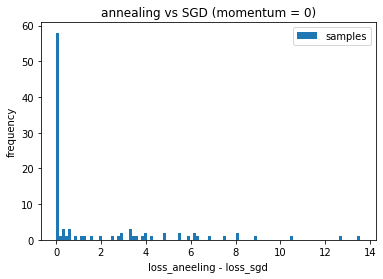

In [18]:
res = np.array(res)
fig, ax = plt.subplots()
res = np.array(res)
ax.hist(res[:,0] - res[:,-1], label="samples", bins=100)
ax.legend()


ax.set_title('annealing vs SGD (momentum = 0)')
ax.set_xlabel('loss_aneeling - loss_sgd')
ax.set_ylabel("frequency")
save_fig(plt, f'images/hist_annealing_vs_riemansgd_D={D}_L={type(loss).__name__}.jpeg', 400)
# plt.savefig(f'images/hist_sgd_vs_cg_D={D}_L={type(loss).__name__}.jpeg', dpi=400)

Failed save figure : given path exsist images/hist_annealing_vs_riemansgd1_D=2_L=L1.jpeg


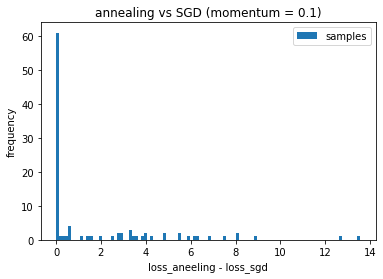

In [19]:
res = np.array(res)
fig, ax = plt.subplots()
res = np.array(res)
ax.hist(res[:,1] - res[:,-1], label="samples", bins=100)
ax.legend()


ax.set_title('annealing vs SGD (momentum = 0.1)')
ax.set_xlabel('loss_aneeling - loss_sgd')
ax.set_ylabel("frequency")
save_fig(plt, f'images/hist_annealing_vs_riemansgd1_D={D}_L={type(loss).__name__}.jpeg', 400)
# plt.savefig(f'images/hist_sgd_vs_cg_D={D}_L={type(loss).__name__}.jpeg', dpi=400)

Failed save figure : given path exsist images/hist_annealing_vs_riemansgd2_D=2_L=L1.jpeg


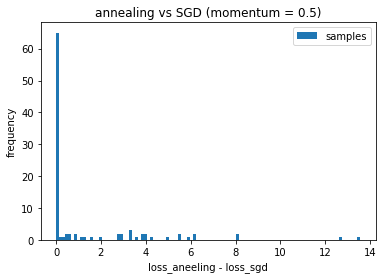

In [20]:
res = np.array(res)
fig, ax = plt.subplots()
res = np.array(res)
ax.hist(res[:,2] - res[:,-1], label="samples", bins=100)
ax.legend()


ax.set_title('annealing vs SGD (momentum = 0.5)')
ax.set_xlabel('loss_aneeling - loss_sgd')
ax.set_ylabel("frequency")
save_fig(plt, f'images/hist_annealing_vs_riemansgd2_D={D}_L={type(loss).__name__}.jpeg', 400)
# plt.savefig(f'images/hist_sgd_vs_cg_D={D}_L={type(loss).__name__}.jpeg', dpi=400)

Failed save figure : given path exsist images/hist_annealing_vs_cg_D=2_L=L1.jpeg


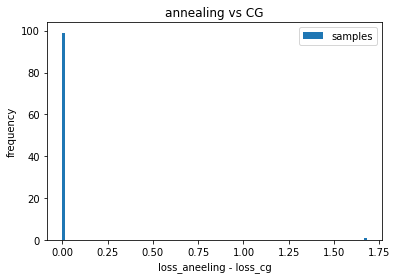

In [21]:
res = np.array(res)
fig, ax = plt.subplots()
res = np.array(res)
ax.hist(res[:,3] - res[:,-1], label="samples", bins=100)
ax.legend()


ax.set_title('annealing vs CG')
ax.set_xlabel('loss_aneeling - loss_cg')
ax.set_ylabel("frequency")
save_fig(plt, f'images/hist_annealing_vs_cg_D={D}_L={type(loss).__name__}.jpeg', 400)
# plt.savefig(f'images/hist_sgd_vs_cg_D={D}_L={type(loss).__name__}.jpeg', dpi=400)

In [27]:
import datetime

dt = datetime.datetime.today()  # ローカルな現在の日付と時刻を取得
"_".join(str(dt).split(" "))

'2022-07-05_06:00:59.753909'